# Titanic Data Cleaning

This notebook performs data exploration and cleaning on the Titanic dataset using Python. The goal is to prepare the data for further analysis or modeling.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [5]:
# Load the dataset (update the path if needed)
df = pd.read_csv(r"C:\Users\Alwin\Documents\Dataset for Data Analysis\titanic\train.csv")

# Show initial records
print("Initial Data Preview:")
print(df.head())

Initial Data Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

## Summary Statistics and Data Types

In [6]:
print("\nSummary statistics:")
print(df.describe(include='all'))

categorical = df.dtypes[df.dtypes == "object"].index
print(df[categorical].describe())

print("\nData types:")
print(df.dtypes)


Summary statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch

## Drop Unnecessary Columns

In [7]:
del df["PassengerId"]
print("Dropped 'PassengerId' column.")

Dropped 'PassengerId' column.


## Convert 'Survived' Column to Categorical

In [8]:
df["Survived"] = pd.Categorical(df["Survived"]).rename_categories(["Died", "Survived"])
print(df["Survived"].value_counts())

Died        549
Survived    342
Name: Survived, dtype: int64


## Transform 'Cabin' Column

In [9]:
char_Cabin = df["Cabin"].astype(str)
df["Cabin"] = pd.Categorical([cabin[0] for cabin in char_Cabin])
print(df["Cabin"].value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


## Handle Missing Values

In [10]:
# Age: Fill with median
median_age = df["Age"].median()
df["Age"] = np.where(df["Age"].isnull(), median_age, df["Age"])
print(f"Filled missing 'Age' with median: {median_age}")

# Embarked: Fill with mode
mode_embarked = df["Embarked"].mode()[0]
df["Embarked"] = np.where(df["Embarked"].isnull(), mode_embarked, df["Embarked"])
print(f"Filled missing 'Embarked' with mode: {mode_embarked}")

Filled missing 'Age' with median: 28.0
Filled missing 'Embarked' with mode: S


## Drop Columns with Too Many Missing Values

In [11]:
missing_fraction = df.isnull().mean()
columns_to_drop = missing_fraction[missing_fraction > 0.5].index
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {list(columns_to_drop)}")

Dropped columns: []


## Encode 'Sex' and Create 'FamilySize'

In [12]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df['FamilySize'] = df['SibSp'] + df['Parch']
print("Added 'FamilySize' feature.")

Added 'FamilySize' feature.


## Outlier Detection and Cleaning

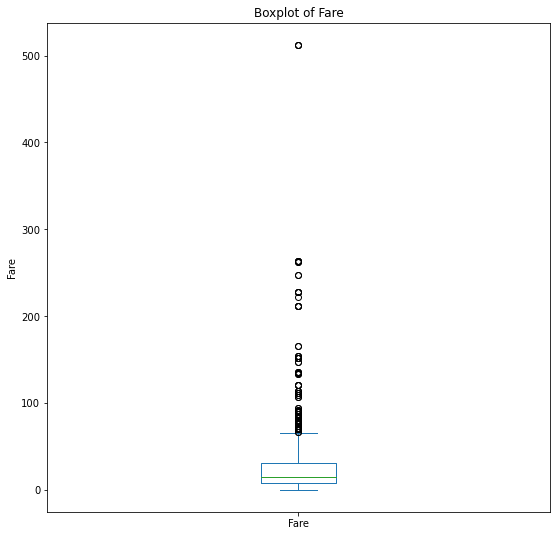

Removed max fare and flagged outliers in Fare column.


In [13]:
df["Fare"].plot(kind="box", figsize=(9, 9))
plt.title("Boxplot of Fare")
plt.ylabel("Fare")
plt.show()

df = df[df["Fare"] != df["Fare"].max()]
df['Fare_outlier'] = np.where(df['Fare'] > 100, 1, 0)
print("Removed max fare and flagged outliers in Fare column.")

## Save Cleaned Data

In [14]:
df.to_csv("titanic_cleaned.csv", index=False)
print("Saved cleaned dataset to 'titanic_cleaned.csv'")

Saved cleaned dataset to 'titanic_cleaned.csv'
